# The Activation Heroes

In [2]:
from fastai.imports import *
from fastbook import *
from torch import nn

from fastai.metrics import accuracy, accuracy_multi

In [12]:
# 1 ReLU
# 2 Sigmoid
# 3 Softmax
# 4 Tanh
# 5 Leaky ReLU

It's about introducing non linearity, (linearity = straight boring line)

Do we always want probabilities at the end?

Vanishing Gradients Problem

ReLU
  addresses the vanishing gradient problem to some extent, allowing models to learn faster and perform better. However, it's not suitable for output layers in classification tasks due to its unbounded output range.

Leaky ReLU
 It allows a small, non-zero gradient when the unit is not active, helping to keep the gradient flow alive during training.

In summary, their missions:

- Leaky and ReLU: hidden layers
- Tanh: also hidden layer, data is symmetrically distribited, center is 0, and you want both negative and positive (-1 and 1)
- Sigmoid: binary classification (symmetric distribution, 0 and 1)
- Softmax multi-class classification (you want probab distrib over several classes)

# ReLU

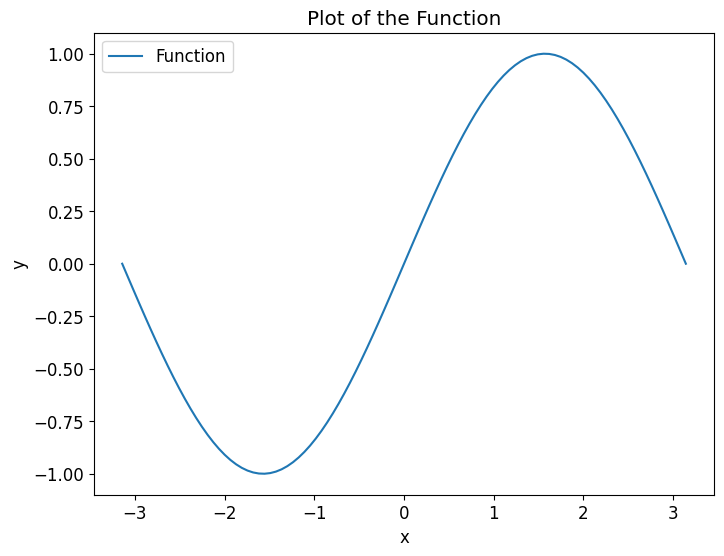

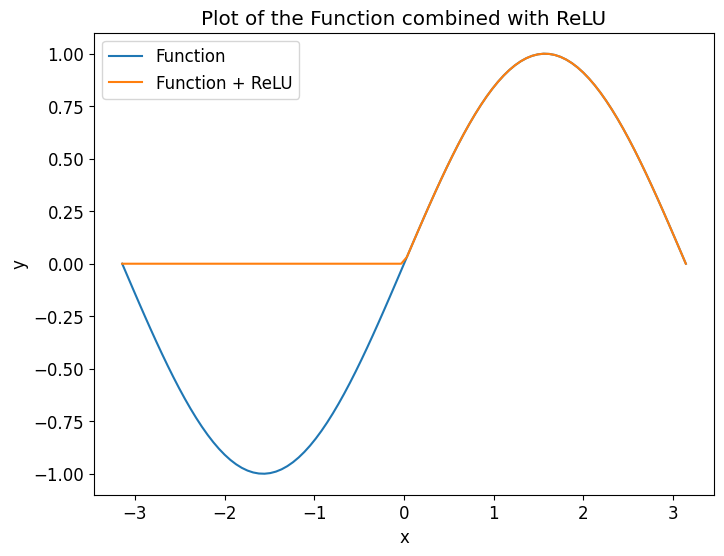

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def my_function(x):
    return np.sin(x)

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Generate x values
x = np.linspace(-np.pi, np.pi, 100)

# Calculate y values for the function
y_function = my_function(x)

# Calculate y values for the ReLU activation
y_relu = relu(y_function)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y_function, label='Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Function')
plt.legend()

# Plot the function combined with ReLU
plt.figure(figsize=(8, 6))
plt.plot(x, y_function, label='Function')
plt.plot(x, y_relu, label='Function + ReLU')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Function combined with ReLU')
plt.legend()

# Show the plots
plt.show()

# Sigmoid

In [2]:
# the gist of it
def sigmoid_code(z):
    """
    Compute the sigmoid of z.

    Parameters:
    z (numpy.ndarray): Input array

    Returns:
    numpy.ndarray: Sigmoid of input
    """
    return 1 / (1 + np.exp(-z))


In [ ]:
import torch
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


# Define the sigmoid function using PyTorch
def sigmoid(z):
    return torch.sigmoid(torch.tensor(z, dtype=torch.float32)).item()

# Function to plot
def plot_sigmoid(z):
    z_values = torch.linspace(-10, 10, 100)  # Generate 100 points between -10 and 10
    sigmoid_values = torch.sigmoid(z_values).numpy()  # Apply sigmoid function and convert to numpy for plotting

    plt.figure(figsize=(10, 6))
    plt.plot(z_values.numpy(), sigmoid_values, label='Sigmoid Function')
    plt.scatter(z, sigmoid(z), color='red', label=f'Sigmoid({z}) = {sigmoid(z):.2f}')
    plt.title('Sigmoid Function')
    plt.xlabel('z')
    plt.ylabel('σ(z)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create an interactive slider for the input value
interact(plot_sigmoid, z=FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='z'))

# Softmax

In [130]:
three_categories = torch.randn((5,3)) * 2
three_categories

tensor([[ 2.5302, -0.6356, -0.8558],
        [-1.0014, -0.2613,  1.9591],
        [ 1.1920, -2.9447, -0.9497],
        [ 3.3279,  0.0219,  0.2894],
        [ 2.5636, -3.1904, -2.1296]])

In [131]:
# def softmax(lst):
#     exp_values = [math.exp(i) for i in lst]
#     sum_exp_values = sum(exp_values)
#     return [j/sum_exp_values for j in exp_values]

sm_acts = torch.softmax(three_categories, dim=1)
sm_acts

tensor([[0.9294, 0.0392, 0.0315],
        [0.0446, 0.0936, 0.8618],
        [0.8823, 0.0141, 0.1036],
        [0.9220, 0.0338, 0.0442],
        [0.9878, 0.0031, 0.0090]])

In [132]:
# def sigmoid(x):
#     return 1 / (1 + math.exp(-x))

torch.sigmoid(three_categories)

tensor([[0.9262, 0.3462, 0.2982],
        [0.2687, 0.4350, 0.8764],
        [0.7671, 0.0500, 0.2789],
        [0.9654, 0.5055, 0.5718],
        [0.9285, 0.0395, 0.1063]])

In [128]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Function to plot using PyTorch's softmax
def plot_softmax(z1, z2, z3):
    z = torch.tensor([z1, z2, z3], dtype=torch.float32)
    sm = torch.nn.functional.softmax(z, dim=0).numpy()  # Use PyTorch's softmax and convert to numpy array

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 4), sm, marker='o', linestyle='-', color='blue')
    plt.xticks(range(1, 4), [f'z{i+1}' for i in range(3)])
    plt.xlabel('Input Index')
    plt.ylabel('Softmax Probability')
    plt.title('Softmax Function with PyTorch (3 Points)')
    plt.ylim(0, 1.1)
    for i, txt in enumerate(sm):
        plt.annotate(f'{txt:.2f}', (i+1, sm[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.grid(True)
    plt.show()

# Create interactive sliders for the input values
interact(plot_softmax,
         z1=FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='z1'),
         z2=FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='z2'),
         z3=FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='z3'))

interactive(children=(FloatSlider(value=0.0, description='z1', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

<function __main__.plot_softmax(z1, z2, z3)>

# Log

In [101]:
torch.random.manual_seed(42);

In [10]:
import torch
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the -log function using torch.log
def log(x):
    return torch.log(x)

# Function to plot
def plot_neg_log(x):
    x_tensor = torch.tensor(x)  # Convert the input value to a PyTorch tensor
    x_values = torch.linspace(0.01, 1, 100)  # Generate 100 points between 0.01 and 1 using torch.linspace
    neg_log_values = log(x_values)

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, neg_log_values, label='log Function')
    plt.scatter(x_tensor, log(x_tensor), color='red', label=f'log({x_tensor.item():.2f}) = {log(x_tensor).item():.2f}')
    plt.title('log Function')
    plt.xlabel('x')
    plt.ylabel('log(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create an interactive slider for the input value
interact(plot_neg_log, x=FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, description='x'))

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, min=0.01, step=0.01), Output()), _dom_c…

<function __main__.plot_neg_log(x)>

# Binary Classification

In [92]:
# column tensor with one single label
targ = tensor([3, 7, 3]).view(-1, 1)
targ

tensor([[3],
        [7],
        [3]])

In [62]:
acts = torch.randn((3,2))*2
acts

tensor([[ 3.1961,  0.2230],
        [-0.0784,  2.8223],
        [-1.3112,  1.7152]])

In [63]:
def binary_loss(logits, targ):
    probs = logits.sigmoid() 
    # dist =  (preds - targets).abs().float()
    # return dist.mean()
    dist = torch.where(targ==1, 1-probs, probs)
    return dist.mean()

binary_loss(acts, targ)

tensor(0.6667)

In [70]:
def my_binary_accuracy(logits, targ):
    probs = logits.sigmoid()
    correct = (probs>0.5) == targ
    print(probs)
    print(probs>0.5)
    return correct.float().mean()

my_binary_accuracy(acts, targ)

tensor([[0.9607, 0.5555],
        [0.4804, 0.9439],
        [0.2123, 0.8475]])
tensor([[ True,  True],
        [False,  True],
        [False,  True]])


tensor(0.)

###  Binary Cross-Entropy 

𝐽=−1𝑚∑𝑚𝑖=1(𝑦(𝑖)log(𝑎(𝑖))+(1−𝑦(𝑖))log(1−𝑎(𝑖)))

In [1]:
def binary_cross_entropy(w, b, X, Y):
    # Arguments:
    # w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    # b -- bias, a scalar
    # X -- data of size (num_px * num_px * 3, number of examples)
    # Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    m = X.shape[1]
    A = sigmoid(w * X + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

# Multi Classification

In [109]:
# one hot encoding
targ = tensor([0,1,0])

In [110]:
acts = torch.randn((3,2))*2
acts

tensor([[ 0.8000, -2.4078],
        [-0.8395, -2.3858],
        [-1.8701,  0.4276]])

In [111]:
# softmax sums the columns to 1 and distribute the probabilities
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.9611, 0.0389],
        [0.8244, 0.1756],
        [0.0913, 0.9087]])

In [112]:
idx = range(sm_acts.shape[0])
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["prob of being 3","prob of being 7"])
df['targ'] = targ
df['idx'] = idx
df['targ_prob'] = sm_acts[idx, targ]
t = df.style.hide(axis='index')
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

prob of being 3,prob of being 7,targ,idx,targ_prob
0.961127,0.038873,0,0,0.961127
0.824375,0.175625,1,1,0.175625
0.091311,0.908689,0,2,0.091311


In [113]:
from IPython.display import HTML
df['diff'] = 1-df['targ_prob']
df['loss'] = -torch.log(tensor(df['targ_prob']))
t = df.style
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

,prob of being 3,prob of being 7,targ,idx,targ_prob,diff,loss
0,0.961127,0.038873,0,0,0.961127,0.038873,0.039649
1,0.824375,0.175625,1,1,0.175625,0.824375,1.739406
2,0.091311,0.908689,0,2,0.091311,0.908689,2.393484


In [119]:
def my_cross_entropy_loss_with_logits(acts, targ):
    sm_acts = torch.log_softmax(acts, dim=1)
    return F.nll_loss(sm_acts, targ, reduction='none')

my_cross_entropy_loss_with_logits(acts, targ), nn.CrossEntropyLoss(reduction='none')(acts, targ)


(tensor([0.0396, 1.7394, 2.3935]), tensor([0.0396, 1.7394, 2.3935]))

In [122]:
def my_multiclass_accuracy(inp, targ, axis=-1):
    "Compute accuracy with `targ` when `pred` is bs * n_classes"
    pred = inp.argmax(dim=axis)
    return (pred == targ).float().mean()

my_multiclass_accuracy(acts, targ), accuracy(acts, targ)

(tensor(0.3333), TensorBase(0.3333))

# Multi Label

In [125]:
targ = tensor([0, 1, 1, 0 ,1],
              [0, 0, 1, 1, 0]).float()
acts = torch.randn((2,5))*2
acts

tensor([[-2.5684, -1.3834, -1.0719,  0.6710,  0.4939],
        [ 0.0649,  0.8114,  3.2362,  0.7863, -0.4296]])

In [126]:
def binary_cross_entropy(inputs, targets):
    inputs = inputs.sigmoid()
    return -torch.where(targets==1, inputs, 1-inputs).log().mean()

binary_cross_entropy(acts, targ), nn.BCEWithLogitsLoss()(acts, targ)

(tensor(0.7428), tensor(0.7428))

In [127]:
def my_multicat_accuracy(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

my_multicat_accuracy(acts, targ), accuracy_multi(inp=acts, targ=targ)

(tensor(0.5000), TensorBase(0.5000))

# Normalization

### Mean & Std

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mean_std(data):
    # Calculate mean and standard deviation
    mean = data.mean()
    std_dev = data.std()

    # Plot the data
    plt.plot(data, label='Data')
    plt.axhline(mean, color='r', linestyle='--', label='Mean')

    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Mean and STD')

    # Add error bar
    plt.errorbar(0, mean, yerr=std_dev, fmt='o')

     # Add text for mean and standard deviation
    plt.text(0, mean, f'Mean: {mean:.2f}', ha='left', va='bottom', color='red')
    plt.text(0, mean + std_dev, f'Std Dev: {std_dev:.2f}', ha='right', va='bottom', color='green')

    # # Remove x-axis ticks
    plt.xticks([])

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

In [76]:
a = torch.Tensor(100)
a.uniform_(-5, 5)
a.shape

torch.Size([100])

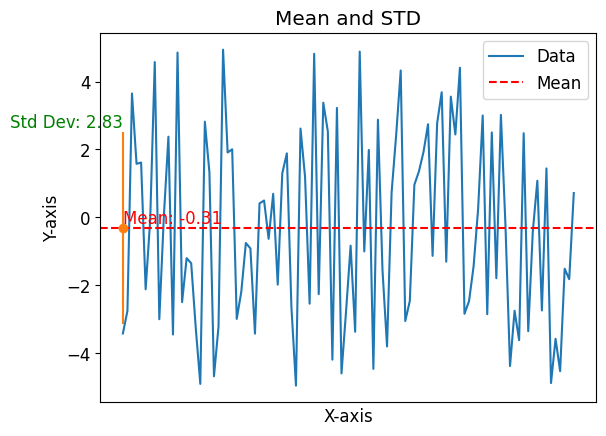

In [83]:
plot_mean_std(a)

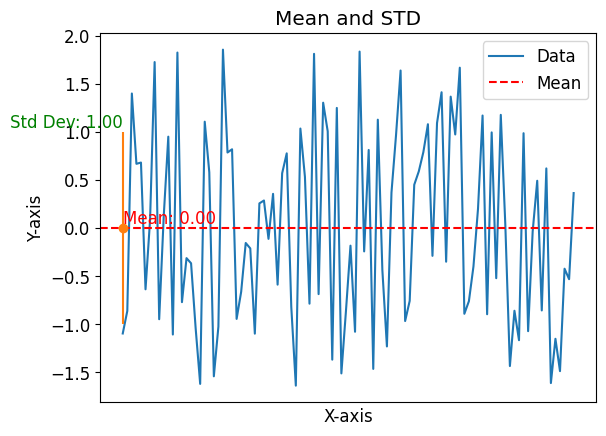

In [84]:
import torch.nn.functional as F

def my_normalize(a):
    return (a - a.mean()) / a.std()

normalized = my_normalize(a)
plot_mean_std(normalized)

# Chain Rule

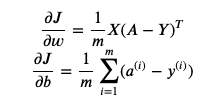

In [3]:
def compute_gradient(X, A, Y, m):
    """
    Compute the gradient ∂J/∂w
    
    Parameters:
    X : numpy array of shape (n_features, m)
        Input features
    A : numpy array of shape (1, m)
        Predicted values
    Y : numpy array of shape (1, m)
        True labels
    m : int
        Number of training examples
    
    Returns:
    dJ_dw : numpy array of shape (n_features, 1)
        Gradient of the cost with respect to w
    """
    # Compute (A - Y)
    difference = A - Y
    
    # Compute X * (A - Y)^T
    # Note: We use .T to transpose (A - Y)
    product = np.dot(X, difference.T)
    
    # Compute (1/m) * X * (A - Y)^T
    dJ_dw = (1 / m) * product
    
    return dJ_dw



def compute_bias_gradient(A, Y):
    """
    Compute the gradient ∂J/∂b
    
    Parameters:
    A : numpy array of shape (1, m)
        Predicted values
    Y : numpy array of shape (1, m)
        True labels
    
    Returns:
    dJ_db : float
        Gradient of the cost with respect to b
    """
    m = A.shape[1]  # Number of training examples
    
    # Compute the difference (A - Y)
    difference = A - Y
    
    # Sum the differences and divide by m
    dJ_db = np.sum(difference) / m
    
    return dJ_db